In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras as k

from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, Flatten,Dropout,BatchNormalization,Lambda
from keras.layers import Conv1D,MaxPool1D,GlobalMaxPool1D,Embedding
from keras.layers import LSTM,GRU,RNN
from keras.models import Sequential
from keras.optimizers import Adam, Adagrad,Adadelta,Nadam
from keras import callbacks
from keras import regularizers
from keras.utils import plot_model
from keras.models import load_model

from matplotlib import pyplot as plt 
%matplotlib inline

In [2]:
!ls

sample_data


In [3]:
from google.colab import files
test = files.upload()

Saving facebook_health_cases (labelled).csv to facebook_health_cases (labelled).csv


In [6]:
files.upload()

Saving train.csv to train.csv


{'train.csv': b'cleaned,sentiment\npenang pahang johor kluster meninggi,negative\ntotal lockdown sebulan pembasmian perosak seketika sebulan sanitizer wilayahnya isi rumah kongsi asrama pekerja pembersihan membidas kais makan drastik sikit,neutral\nsemoga virus covid terseliuh langkah cakerawala,positive\nget wel soon,positive\nturunnya berjoging berbeska melambak lambak pernah kawasan raya sempurna pelatih baik berpanjangan abih camno,negative\njadikan sarawak rujukkan gara rentas negeri kawen hal naik menyambung medan kampung dimensi bimbang semoga kkm meneliti ruang pikiran kekaisaran negara sarawak memperoleh dolok kehidupan dukuh kurang tanah sarawak mendalam benda balik balik pulang terlindung time nyaring mengembalikan idaman hasrat memandang gelap,negative\nkes menurun elok elok,positive\npuak doktrin pengawasan sengit banyak menggunakan permohonan menghabiskan tuding jari Tiada berat memberitahu bersemayam semoga virus hlg sepenuhnya,positive\nperkara membawa terampil negeri u

In [7]:
files.upload()

Saving test.csv to test.csv


{'test.csv': b'cleaned,sentiment\nsyukur semoga markah berkurang,positive\nminggu pkp kes tidak turun meningkat buatlah pkp serius takmau pkp wayang pkp main kaedah terbaik kesian budak sekolah time raya kes naik ribu raya tidak,negative\nselangor gurih dikedudukan teratas serawak pulang kedudukan johor pulau pinang jelasnya kehadapan tahniah selangor tahniah penang menawan,neutral\nkes naik tak bersebelahan pucuk vaksin naik,negative\nkurang bravo pru pkp kepulangan berjalan,negative\ndeaths family loosing loved ones sad rip whoever may,negative\nhibah fwd takaful dolar sebulan dolar meninggal covid benefisiari ringgit tekan link,neutral\npkp menggali rmah tanggung jawab wlupn pkp bezanya dpat hubungannya penceritaan rents negeri jm kndraan shaja mengehadkan sdangkan pnca covid mjority kedudukan stil mengintai balik jangkitan nsib manfaat penang sekolah asalnya memulakan,neutral\nkelonggaran berniaga peduli berdiri ikit sop coz belum berlapang patung patung coz taraf hidupnya kelainan

In [8]:
!ls

'facebook_health_cases (labelled).csv'	 sample_data   test.csv   train.csv


In [4]:
texts = pd.read_csv('facebook_health_cases (labelled).csv')
df = pd.DataFrame(texts)
df

date  ... sentiment
0     20210309  ...  negative
1     20210304  ...   neutral
2     20210104  ...  negative
3     20210303  ...  positive
4     20210221  ...  negative
...        ...  ...       ...
7017  20210209  ...  negative
7018  20210211  ...  negative
7019  20210108  ...  positive
7020  20210216  ...  negative
7021  20210209  ...  positive

[7022 rows x 6 columns]

In [13]:
# Shuffle your dataset 
shuffle_df = df.sample(frac=1)

# Define a size for your train set 
train_size = int(0.95 * len(df))

# Split your dataset 
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

In [14]:
print(train_set.shape)
print(test_set.shape)

(6670, 6)
(352, 6)


In [15]:
print("Max length: %s" %df.check.str.len().max())
print("Mean length: %s" %df.check.str.len().mean())
print("Min length: %s" %df.check.str.len().min())

Max length: 1070
Mean length: 90.22215892908004
Min length: 3


In [16]:
MAX_SEQ_LEN = 1000
VOCAB_SIZE = 100000

num_words: the maximum number of words to keep, based on word frequency. Only the most common num_words-1 words will be kept.

In [17]:
tokenizer = Tokenizer(num_words = VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(train_set['check'])
test_sequences = tokenizer.texts_to_sequences(test_set['check'])

In [18]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9953 unique tokens.


maxlen = Optional Int, maximum length of all sequences. If not provided, sequences will be padded to the length of the longest individual sequence.

In [19]:
train_data = pad_sequences(train_sequences, maxlen= MAX_SEQ_LEN)
test_data = pad_sequences(test_sequences, maxlen= MAX_SEQ_LEN)
print(train_data.shape)
print(test_data.shape)

(6670, 1000)
(352, 1000)


In [22]:
train_labels = train_set['sentiment']

In [23]:
label_encoder = LabelEncoder()
label_encoder.fit(train_labels)
train_labels = label_encoder.transform(train_labels)

print(label_encoder.classes_)

['negative' 'neutral' 'positive']


In [24]:
train_labels

array([0, 1, 2, ..., 2, 0, 0])

In [25]:
#convert to labels to one-hot-coded
train_tensor = to_categorical(np.array(train_labels))

print("Train tensor shape:",train_data.shape)
print("Train labels tensor shape:",train_tensor.shape)

Train tensor shape: (6670, 1000)
Train labels tensor shape: (6670, 3)


In [26]:
EMBEDDING_DIM = 100
INITIALIZER = 'he_uniform'
REGULARIZER = regularizers.l2(0.01)

LSTM_model = Sequential()
LSTM_model.add(Embedding(input_dim= VOCAB_SIZE, 
                    output_dim= EMBEDDING_DIM ,
                    input_length= MAX_SEQ_LEN,
                    embeddings_regularizer = REGULARIZER
                   ))
#cuDNN_LSTM_model.add(Lambda(lambda x: tf.expand_dims(cuDNN_LSTM_model.output, axis=-1)))
LSTM_model.add(LSTM(128 ,#activation= 'relu',
               return_sequences=True,
               name="lstm_1"
              ))
LSTM_model.add(LSTM(64 ,#activation= 'relu',
               return_sequences=False,
               name="lstm_2"
              ))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(BatchNormalization())

LSTM_model.add(Dense(128,activation= 'relu'))
LSTM_model.add(Dropout(0.5))
LSTM_model.add(BatchNormalization())
LSTM_model.add(Dense(3,activation= 'softmax'))

In [27]:
adam = Adam(lr=0.001)
LSTM_model.compile(loss = 'categorical_crossentropy',
             optimizer = adam,
             metrics = ['accuracy']
             )

LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 100)         10000000  
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000, 128)         117248    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [28]:
reduce_lr = callbacks.ReduceLROnPlateau(monitor= 'val_accuracy', factor= 0.1,
                                       patience= 10, min_lr= 0.00001,
                                       verbose= 1)

early_stop = callbacks.EarlyStopping(monitor= 'val_accuracy', mode= 'auto',
                                     patience= 15,
                                    verbose= 1)
                                     #restore_best_weights= True)

#file_path = "cnn4_weights.{epoch:02d}-{val_loss:.2f}.hdf5"
file_path = "cudnn_lstm_weights.hdf5"
model_chkpt = callbacks.ModelCheckpoint(filepath=file_path,monitor= 'val_accuracy', save_best_only=True)

In [29]:
history = LSTM_model.fit(train_data , train_tensor ,
         batch_size = 64, shuffle = True,
         epochs=1000,validation_split = 0.2,
         callbacks = [reduce_lr,early_stop,model_chkpt]
         )

Epoch 1/1000
84/84 [==============================] - 47s 160ms/step - loss: 35.5196 - accuracy: 0.4655 - val_loss: 1.4398 - val_accuracy: 0.5375
Epoch 2/1000
84/84 [==============================] - 13s 151ms/step - loss: 1.1249 - accuracy: 0.7050 - val_loss: 1.2390 - val_accuracy: 0.5375
Epoch 3/1000
84/84 [==============================] - 13s 150ms/step - loss: 0.8466 - accuracy: 0.7647 - val_loss: 1.1670 - val_accuracy: 0.5427
Epoch 4/1000
84/84 [==============================] - 13s 151ms/step - loss: 0.7407 - accuracy: 0.7988 - val_loss: 1.1481 - val_accuracy: 0.5682
Epoch 5/1000
84/84 [==============================] - 13s 150ms/step - loss: 0.7181 - accuracy: 0.8142 - val_loss: 1.0709 - val_accuracy: 0.6109
Epoch 6/1000
84/84 [==============================] - 13s 151ms/step - loss: 0.6195 - accuracy: 0.8597 - val_loss: 1.0042 - val_accuracy: 0.6837
Epoch 7/1000
84/84 [==============================] - 13s 151ms/step - loss: 0.6423 - accuracy: 0.8435 - val_loss: 0.9958 - val_a

In [30]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

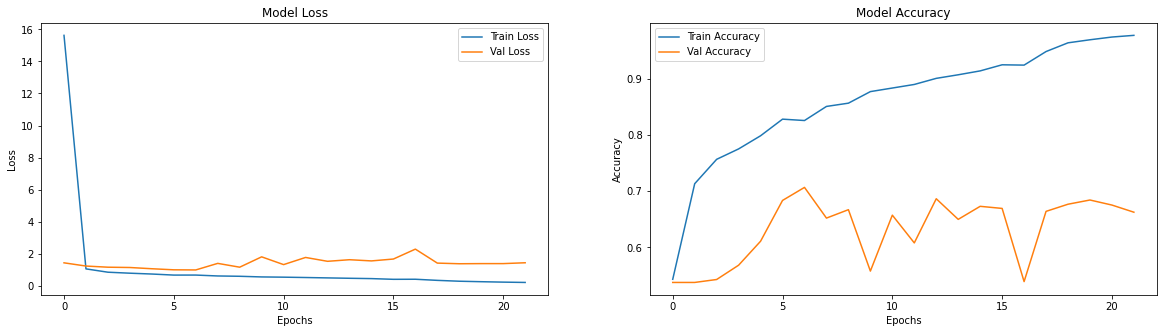

In [31]:
plt.figure(figsize=(20,5))
ax = plt.subplot(1,2,1)
ax.set_title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(train_loss , label ="Train Loss")
plt.plot(val_loss, label ="Val Loss")
plt.legend()

ax = plt.subplot(1,2,2)
ax.set_title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(train_acc, label = "Train Accuracy")
plt.plot(val_acc, label = "Val Accuracy")
plt.legend()
plt.show();

model overfit

Evaluate model with trained LSTM

In [32]:
evaluation = LSTM_model.evaluate(train_data,train_tensor)
print("Train Loss: %f"%evaluation[0] , "Train Accuracy: %f"%evaluation[1])

209/209 [==============================] - 10s 48ms/step - loss: 0.4389 - accuracy: 0.9219
Train Loss: 0.438943 Train Accuracy: 0.921889


Evaluate model with best score of trained LSTM

In [33]:
# with best weight
best_weights_lstm = load_model(file_path)
evaluation = best_weights_lstm.evaluate(train_data,train_tensor)
print("Train Loss: %f"%evaluation[0] , "Train Accuracy: %f"%evaluation[1])

209/209 [==============================] - 11s 47ms/step - loss: 0.6843 - accuracy: 0.8636
Train Loss: 0.684257 Train Accuracy: 0.863568


Convert test target with one-hot encoded

In [36]:
test_labels = test_set['sentiment']
label_encoder = LabelEncoder()
label_encoder.fit(test_set['sentiment'])
test_labels = label_encoder.transform(test_labels)

test_tensor = to_categorical(np.array(test_labels))

Evaluate test data with trained LSTM

In [37]:
!ls

 cudnn_lstm_weights.hdf5		 sample_data   train.csv
'facebook_health_cases (labelled).csv'	 test.csv


In [38]:
loss, accuracy = LSTM_model.evaluate(test_data, test_tensor)
print("Testing Accuracy:  {:.4f}".format(accuracy))

11/11 [==============================] - 1s 61ms/step - loss: 1.4168 - accuracy: 0.6790
Testing Accuracy:  0.6790


Evaluate test data with best weight of trained LSTM

In [40]:
loss, accuracy = best_weights_lstm.evaluate(test_data, test_tensor)
print("Testing Accuracy:  {:.4f}".format(accuracy))

11/11 [==============================] - 1s 59ms/step - loss: 0.9688 - accuracy: 0.7159
Testing Accuracy:  0.7159


In [41]:
y_pre=best_weights_lstm.predict(test_data)

In [52]:
scores = []
for i in y_pre:
  scores.append(np.where(i == np.amax(i))[0][0])

In [59]:
sub=pd.DataFrame({'check':test_set.check.values.tolist(),'target':test_set.sentiment.values.tolist(),'predicted':scores})

In [60]:
sub

check    target  predicted
0    besok naik ribu lusa turun raya cina naik tak ...  negative          0
1                            tpt lancar kerja memasing  negative          1
2            berdoa patuhi sop semoga dilindungi ameen  positive          2
3    perak tidak payah buka sekolah membimbangkan a...  negative          0
4                                     wow vaksin pawer   neutral          0
..                                                 ...       ...        ...
347  naik muak menengok selangor menang sesaja main...  negative          0
348  menyampah komen anggp covid penipu tengok kera...  negative          0
349  kes kedah naik naik akibat kluster kerja kerja...  negative          0
350  ramai tidak reti pkiaq logik sikit tak start p...  negative          0
351  mohon kkm data khusus kanak positive covid bap...  negative          0

[352 rows x 3 columns]

In [61]:
sub.to_csv('lstm_check.csv',index=False)
files.download('lstm_check.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### GRU

In [ ]:
EMBEDDING_DIM = 100
INITIALIZER = 'he_uniform'
REGULARIZER = regularizers.l2(0.01)

GRU_model = Sequential()
GRU_model.add(Embedding(input_dim= VOCAB_SIZE, 
                    output_dim= EMBEDDING_DIM ,
                    input_length= MAX_SEQ_LEN,
                    embeddings_regularizer = REGULARIZER
                   ))


#cuDNN_GRU_model.add(Lambda(lambda x: tf.expand_dims(cuDNN_GRU_model.output, axis=-1)))
GRU_model.add(GRU(128, return_sequences= True)) 
GRU_model.add(GRU(64, return_sequences= True))
GRU_model.add(GRU(32, return_sequences= False))
GRU_model.add(Dropout(0.2))
GRU_model.add(BatchNormalization())

GRU_model.add(Dense(128,activation= 'relu'))
GRU_model.add(Dropout(0.5))
GRU_model.add(BatchNormalization())
GRU_model.add(Dense(3,activation= 'softmax'))

In [ ]:
adam = Adam(lr=0.001)
#adagrad = Adagrad()
#adadelta = Adadelta()
#nadam = Nadam(lr=0.001)
GRU_model.compile(loss = 'categorical_crossentropy',
             optimizer = adam,
             metrics = ['accuracy']
             )

GRU_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 100)         10000000  
_________________________________________________________________
gru (GRU)                    (None, 1000, 128)         88320     
_________________________________________________________________
gru_1 (GRU)                  (None, 1000, 64)          37248     
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                9408      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [ ]:
metric = 'val_accuracy'

reduce_lr = callbacks.ReduceLROnPlateau(monitor= metric, factor= 0.1,
                                       patience= 10, min_lr= 0.00001,
                                       verbose= 1)

early_stop = callbacks.EarlyStopping(monitor= metric, mode= 'auto',
                                     patience= 15,
                                    verbose= 1)
                                     #restore_best_weights= True)

#file_path = "cnn4_weights.{epoch:02d}-{val_loss:.2f}.hdf5"
file_path = "cudnn_gru_weights.hdf5"
model_chkpt = callbacks.ModelCheckpoint(filepath=file_path,monitor= metric, save_best_only=True)

In [ ]:
history = GRU_model.fit(train_data , train_tensor ,
         batch_size = 64, shuffle = True,
         epochs=1000,validation_split = 0.2,
         callbacks = [reduce_lr,early_stop,model_chkpt]
         )

Epoch 1/1000
71/71 [==============================] - 17s 185ms/step - loss: 38.9589 - accuracy: 0.4429 - val_loss: 1.5692 - val_accuracy: 0.5676
Epoch 2/1000
71/71 [==============================] - 12s 172ms/step - loss: 1.3090 - accuracy: 0.6876 - val_loss: 1.2703 - val_accuracy: 0.5703
Epoch 3/1000
71/71 [==============================] - 12s 176ms/step - loss: 0.8956 - accuracy: 0.7653 - val_loss: 1.1128 - val_accuracy: 0.6406
Epoch 4/1000
71/71 [==============================] - 12s 175ms/step - loss: 0.7829 - accuracy: 0.8017 - val_loss: 1.0165 - val_accuracy: 0.7020
Epoch 5/1000
71/71 [==============================] - 12s 175ms/step - loss: 0.6803 - accuracy: 0.8367 - val_loss: 1.1297 - val_accuracy: 0.6441
Epoch 6/1000
71/71 [==============================] - 12s 174ms/step - loss: 0.6546 - accuracy: 0.8537 - val_loss: 1.0420 - val_accuracy: 0.6744
Epoch 7/1000
71/71 [==============================] - 12s 173ms/step - loss: 0.5916 - accuracy: 0.8775 - val_loss: 1.1214 - val_a

In [ ]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

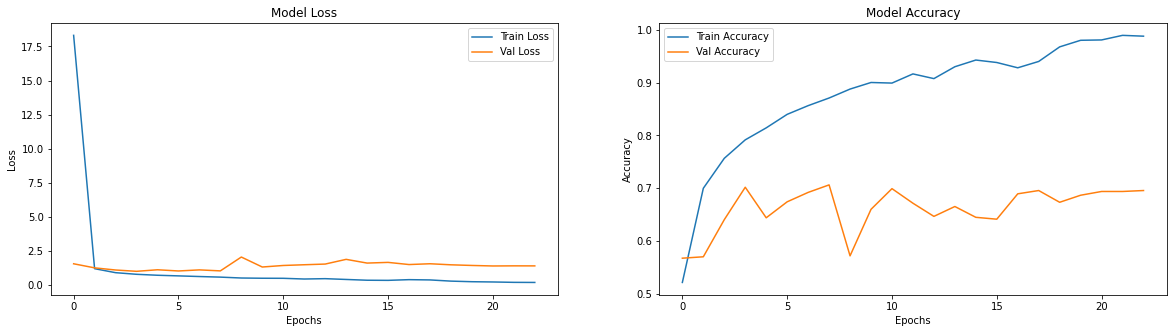

In [ ]:
plt.figure(figsize=(20,5))
ax = plt.subplot(1,2,1)
ax.set_title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(train_loss , label ="Train Loss")
plt.plot(val_loss, label ="Val Loss")
plt.legend()

ax = plt.subplot(1,2,2)
ax.set_title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(train_acc, label = "Train Accuracy")
plt.plot(val_acc, label = "Val Accuracy")
plt.legend()
plt.show();

In [ ]:
evaluation = GRU_model.evaluate(train_data,train_tensor)
print("Train Loss: %f"%evaluation[0] , "Train Accuracy: %f"%evaluation[1])

176/176 [==============================] - 11s 60ms/step - loss: 0.4228 - accuracy: 0.9345
Train Loss: 0.422800 Train Accuracy: 0.934485


In [ ]:
# with best weight
best_weights_gru = load_model(file_path)
evaluation = best_weights_gru.evaluate(train_data,train_tensor)
print("Train Loss: %f"%evaluation[0] , "Train Accuracy: %f"%evaluation[1])

176/176 [==============================] - 11s 60ms/step - loss: 0.6449 - accuracy: 0.8424
Train Loss: 0.644890 Train Accuracy: 0.842443


In [ ]:
loss, accuracy = GRU_model.evaluate(test_data, test_tensor)
print("Testing Accuracy:  {:.4f}".format(accuracy))

44/44 [==============================] - 3s 60ms/step - loss: 1.4009 - accuracy: 0.7011
Testing Accuracy:  0.7011


In [ ]:
loss, accuracy = best_weights_gru.evaluate(test_data, test_tensor)
print("Testing Accuracy:  {:.4f}".format(accuracy))

44/44 [==============================] - 3s 60ms/step - loss: 1.0781 - accuracy: 0.6925
Testing Accuracy:  0.6925


In [ ]:
#files.download(file_path)

In [ ]:
#files.download('cudnn_lstm_weights.hdf5')

In [ ]:
!ls

sample_data
